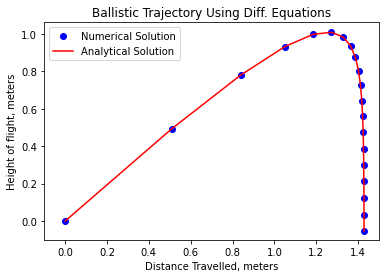

Height reached:  1.007635 meters
Distance Travelled:  1.428072 meters
Time of flight:  1.136842 seconds
Impact velocity:  1.397444 m/s


In [2]:
# Project 1 : Differential Equation Solving Trajectory for a Ballistic
# this code has the ability to solve for a ballistic differential equaiton that
# use specified initial conditions of height, angle of trajectory, mass,
# time taken, and initial speeds in the x and y direction at the beginning. 
#These initial conditions can be changed to suit the circumstances in each 
#specific trial.

# importing all modules needed for project
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

t0 = 0  # intitial time
t_max = 1.2  # max time of flight to be shown for graph
t_inc = 20  # number of increments for time in seconds
c = 0.7  # value of atmospheric friction in kg/s
g = 9.81  # gravity constant in m/s
m = 0.1  # mass of object in kg
vT = (m*g)/c  # Terminal velocity in m/s
vxi = 10  # initial speed for x component in m/s
vyi = 10  # initial speed y component in m/s
theta = np.arctan(vyi/vxi)  # initial angle of ballistic in radians
v0 = np.sqrt(vxi**2+vyi**2)  # magnitude of initial velocity in m/s

initials = [0, 0, vxi, vyi]  # initial conditions for odeint
t_steps = np.linspace(t0, t_max, t_inc)  # array for time values in flight

# function to use with odeint to evaluate derivatives at each increment.

def ballistic_deriv(yLF, tF):
    x = yLF[0]
    y = yLF[1]
    vx = yLF[2]
    vy = yLF[3]
    return[vx, vy, (-c * vx) / m, (-m * g - c * vy) / m]

# solves diff equations with odeint
sol = odeint(ballistic_deriv, initials, t_steps)

# analytical solution using the t_steps time increments
ana_x = ((v0 * vT) / g) * np.cos(theta) * (1 - np.exp(-(g * t_steps) / vT))
ana_y = (vT/g)*(v0*np.sin(theta)+vT)*(1-np.exp(-g*t_steps/vT)) - (vT*t_steps)

# This is the plotting for the graph
plt.plot(sol[:, 0], sol[:, 1], 'bo', label='Numerical Solution')
plt.plot(ana_x, ana_y, 'r', label='Analytical Solution')
plt.title("Ballistic Trajectory Using Diff. Equations")
plt.ylabel("Height of flight, meters")
plt.xlabel("Distance Travelled, meters")
plt.legend(loc='best', numpoints=1)
plt.xlim(-0.1,)  # leaving axis open to accept different conditions
plt.ylim(-0.1,)
plt.show()
#plt.savefig("ballistic.pdf")

# solutions using the my numerical solution
height = np.copy(sol[:, 1])  # copy of y_pos array for height
position = np.copy(sol[:, 1])  # copy of y_pos array to find landing elem
landing = position >= 0  # this takes the above copy and finds element > 0
distance = np.copy(sol[:, 0])  # copy of x pos array
velo_x = np.copy(sol[:, 2])  # velocity on x component at impact
velo_y = np.copy(sol[:, 3])  # velocity y component at impact
ind = len(position[landing]) - 1   # indexing landing element

max_height = np.amax(height)   # max height of ballistic
t_flight = t_steps[ind]   # time of flight
d_flight = distance[ind]   # distance travelled x component
velo_imp = np.sqrt(velo_x[ind]**2 + velo_y[ind]**2)  # velocity at impact

# printing the results to view when the script is run
print("Height reached: {: .6f} meters" .format(max_height))
print("Distance Travelled: {: .6f} meters" .format(d_flight))
print("Time of flight: {: .6f} seconds" .format(t_flight))
print("Impact velocity: {: .6f} m/s" .format(velo_imp))

# writing the result to a new text file, limited decimals for ease of reading
#f = open("ballistic.txt", "w")
#f.write("The distance to travelled is: {:.6f} meters. \n" .format(d_flight))
#f.write("The maximum height reached: {:.6f} meters.\n" .format(max_height))
#f.write("Time of flight: {:.6f} seconds \n" .format(t_flight))
#f.write("The velocity at impact is: {:.6f} m/s" .format(velo_imp))
#f.close()
